In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import colorsys

In [5]:
def show_box(box: np.ndarray, ax, color: str | list[float]="green"):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    # 添加新的patch
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor=color, facecolor=(0,0,0,0), lw=2))

In [10]:
def mulit_colors(num_classes: int):
    #---------------------------------------------------#
    #   https://github.com/bubbliiiing/yolov8-pytorch/blob/master/yolo.py#L88
    #   画框设置不同的颜色
    #---------------------------------------------------#
    #             (hue, saturation, value)
    hsv_tuples = [(x / num_classes, 0.6, 1.) for x in range(num_classes)]
    colors = [colorsys.hsv_to_rgb(*x) for x in hsv_tuples]
    colors = [(x[0], x[1], x[2]) for x in colors]
    return colors
colors = mulit_colors(10)

In [12]:
image = Image.open("bus.jpg")

In [13]:
xyxys = np.array([[ 15.715, 230.05,  803.4, 751.65],
                  [ 668.62, 388.93, 809.52, 877.26],
                  [ 50.789, 399.26, 243.88, 902.38],
                  [ 222.25, 407.42, 345.05, 860.76],
                  [0.18062, 549.58, 61.686, 870.77]])

In [14]:
confs = np.array([0.89302, 0.88603, 0.88056, 0.87822,0.69117])

In [17]:
clses = [0, 1, 1, 1, 1]
names = ["bus", "person"]

# plt直接画图,获取ax需要plt.gca()函数

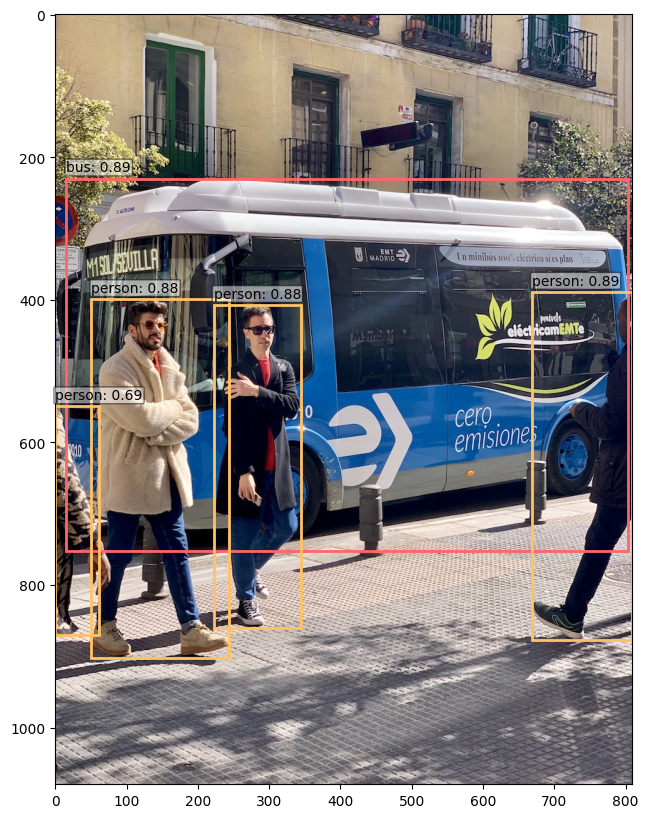

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(image)
for xyxy, conf, cls in zip(xyxys, confs, clses):
    show_box(xyxy, plt.gca(), colors[cls])
    # https://blog.csdn.net/TeFuirnever/article/details/88947248
    plt.text(xyxy[0],
             xyxy[1]-10 if xyxy[1] > 10 else xyxy[1]+20,
             f"{names[cls]}: {conf:.2f}",
             fontdict = dict(fontsize=10, color="black"),
             bbox=dict(boxstyle='round,pad=0.1', fc='white', ec='k',lw=1 ,alpha=0.5) # 文字背景
             )

# plt.subplots直接返回ax就不需要plt.gca()函数

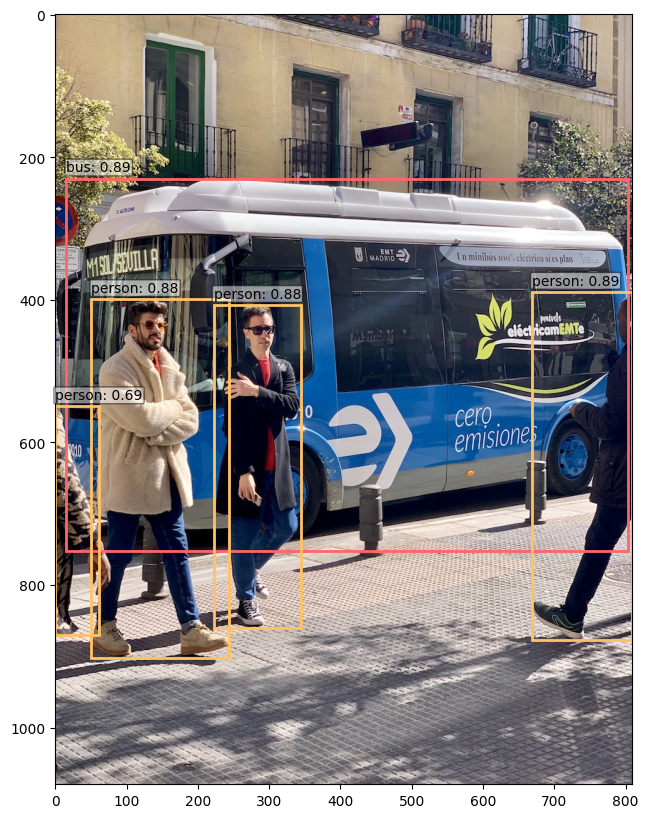

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
axes.imshow(image)
for xyxy, conf, cls in zip(xyxys, confs, clses):
    show_box(xyxy, axes, colors[cls])
    # https://blog.csdn.net/TeFuirnever/article/details/88947248
    axes.text(xyxy[0],
             xyxy[1]-10 if xyxy[1] > 10 else xyxy[1]+20,
             f"{names[cls]}: {conf:.2f}",
             fontdict = dict(fontsize=10, color="black"),
             bbox=dict(boxstyle='round,pad=0.1', fc='white', ec='k',lw=1 ,alpha=0.5) # 文字背景
             )